# The Lorenz Equations and Chaos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### The Strange Attractor $\sigma=10$, $b=8/3$, & $r=28$

In [2]:
σ=10
b=8/3
r=28

In [3]:
def diff(t,k):
    x=k[0]
    y=k[1]
    z=k[2]
    
    dx = σ*(y-x)
    dy = r*x-y-z*x
    dz = x*y-b*z 
    
    return np.array([ dx, dy, dz])

In [4]:
t = np.linspace(0,200,10000)
start=[0,1,0]
sol= solve_ivp(diff, [t[0],t[-1]], start, t_eval=t)

In [5]:
x=sol.y[0]
y=sol.y[1]
z=sol.y[2]

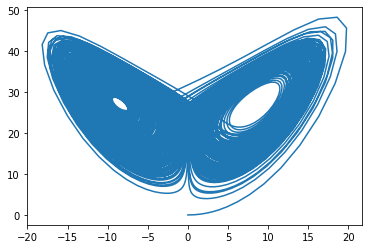

In [6]:
plt.plot(x,z)

C:\Users\chris\AppData\Local\Temp/ipykernel_4724/2570040499.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'z')

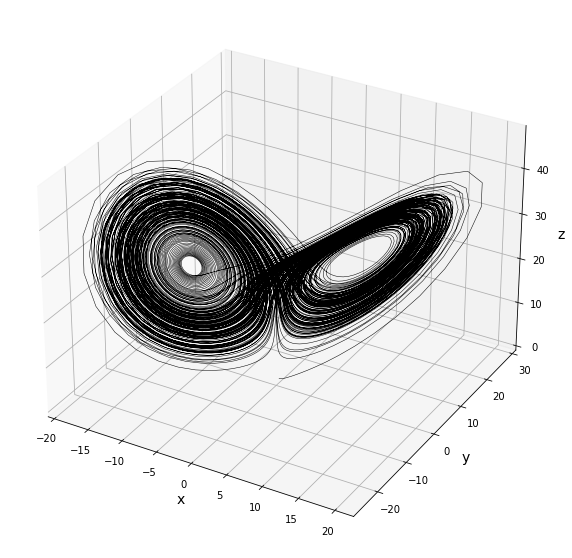

In [7]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')


ax.plot3D(x, y, z, c='black', lw=0.5)

ax.set_xlabel('x', size=14)
ax.set_ylabel('y', size=14)
ax.set_zlabel('z', size=14)

#ax.view_init(15,60)

In [8]:
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line

dataset = np.array([x, y, z])
numDataPoints = len(x)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.view_init(15)

line = plt.plot(dataset[0], dataset[1], dataset[2], lw=0.5, c='black')[0] # For line plot

line_ani = animation.FuncAnimation(fig, func,frames=numDataPoints, fargs=(dataset,line), interval=10, blit=False)
HTML(line_ani.to_html5_video())

C:\Users\chris\AppData\Local\Temp/ipykernel_4724/2713457334.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
